In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [69]:
import pandas as pd
import numpy as np

# Load from UCI site
url = "https://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
col_names = ["duration","protocol_type","service","flag","src_bytes",
            "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
            "logged_in","num_compromised","root_shell","su_attempted","num_root",
            "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
            "is_host_login","is_guest_login","count","srv_count","serror_rate",
            "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
            "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
            "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
            "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
            "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

df = pd.read_csv(url, header=None, names=col_names)

# Add binary label
df['is_attack'] = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)

# Confirm both classes exist
print("Class distribution:\n", df['is_attack'].value_counts())

# Select important features
features = ['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'protocol_type', 'is_attack']
df = df[features]

# Encode categorical
df['protocol_type'] = df['protocol_type'].map({'tcp': 0, 'udp': 1, 'icmp': 2})

# Log transform
df['src_bytes'] = np.log1p(df['src_bytes'])
df['dst_bytes'] = np.log1p(df['dst_bytes'])

# Drop any NaNs
df.dropna(inplace=True)


Class distribution:
 is_attack
1    396743
0     97278
Name: count, dtype: int64


In [68]:
X = df_full.drop(columns='is_attack')
y = df_full['is_attack']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Stratified split done:")
print("Train:\n", y_train.value_counts())
print("Test:\n", y_test.value_counts())


✅ Stratified split done:
Train:
 is_attack
1    395216
Name: count, dtype: int64
Test:
 is_attack
1    98805
Name: count, dtype: int64


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Select features and target
features = ['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'protocol_type']
target = 'is_attack'
X = df[features]
y = df[target]

# Step 1: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

# Step 2: Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE class distribution:\n", pd.Series(y_train_smote).value_counts())

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train initial Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_smote)

# Step 5: Predict and evaluate
y_pred = rf.predict(X_test_scaled)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Train class distribution:
 is_attack
1    317394
0     77822
Name: count, dtype: int64
Test class distribution:
 is_attack
1    79349
0    19456
Name: count, dtype: int64
After SMOTE class distribution:
 is_attack
1    317394
0    317394
Name: count, dtype: int64

Confusion Matrix:
 [[19444    12]
 [  228 79121]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19456
           1       1.00      1.00      1.00     79349

    accuracy                           1.00     98805
   macro avg       0.99      1.00      1.00     98805
weighted avg       1.00      1.00      1.00     98805



In [71]:
!pip install -U imbalanced-learn


In [74]:
# Load original clean dataset again
df = load_data()

# Fix: Remap protocol safely (drop or fill unmapped)
protocol_map = {'tcp': 0, 'udp': 1, 'icmp': 2}
df['protocol_type'] = df['protocol_type'].map(protocol_map)

# Drop any remaining rows with NaNs (protocol_type that were unmapped or any others)
df.dropna(inplace=True)



In [75]:
print("✅ After dropna - rows:", df.shape)
print("✅ Class distribution:\n", df['is_attack'].value_counts())


✅ After dropna - rows: (494021, 6)
✅ Class distribution:
 is_attack
1    494021
Name: count, dtype: int64


In [76]:
X = df.drop(columns=['is_attack'])
y = df['is_attack']

# Proceed with Stratified Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from imblearn.over_sampling import SMOTE

# Load dataset (assuming it’s already cleaned as in Part B)
# Use your previously cleaned df_clean directly here if already defined
df = df_clean.copy()

# Recheck protocol_type is mapped
protocol_map = {'tcp': 0, 'udp': 1, 'icmp': 2}
df['protocol_type'] = df['protocol_type'].map(protocol_map)

# Drop rows with unmapped or missing values
df.dropna(inplace=True)

# Define X and y
X = df.drop(columns=['is_attack'])
y = df['is_attack']

# Split dataset (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# =======================
# Logistic Regression
# =======================
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train_smote)
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("📌 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# =======================
# Random Forest + GridSearchCV
# =======================
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3,
                    scoring='f1_weighted', verbose=1, n_jobs=-1)

grid.fit(X_train_scaled, y_train_smote)
best_rf = grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\n✅ Best Random Forest Params:", grid.best_params_)
print("\n📌 Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# =======================
# ROC Curve Comparison
# =======================
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression vs Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [63]:
# STEP 4: SPLIT FEATURES & LABELS
X = df.drop(columns='is_attack')
y = df['is_attack']

# STEP 5: SPLIT TRAIN / TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [66]:
from sklearn.model_selection import train_test_split

# Perform stratified split to ensure both classes appear in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Verify both classes exist
print("Training set class distribution:")
print(y_train.value_counts())

print("Test set class distribution:")
print(y_test.value_counts())


Training set class distribution:
is_attack
1    395216
Name: count, dtype: int64
Test set class distribution:
is_attack
1    98805
Name: count, dtype: int64


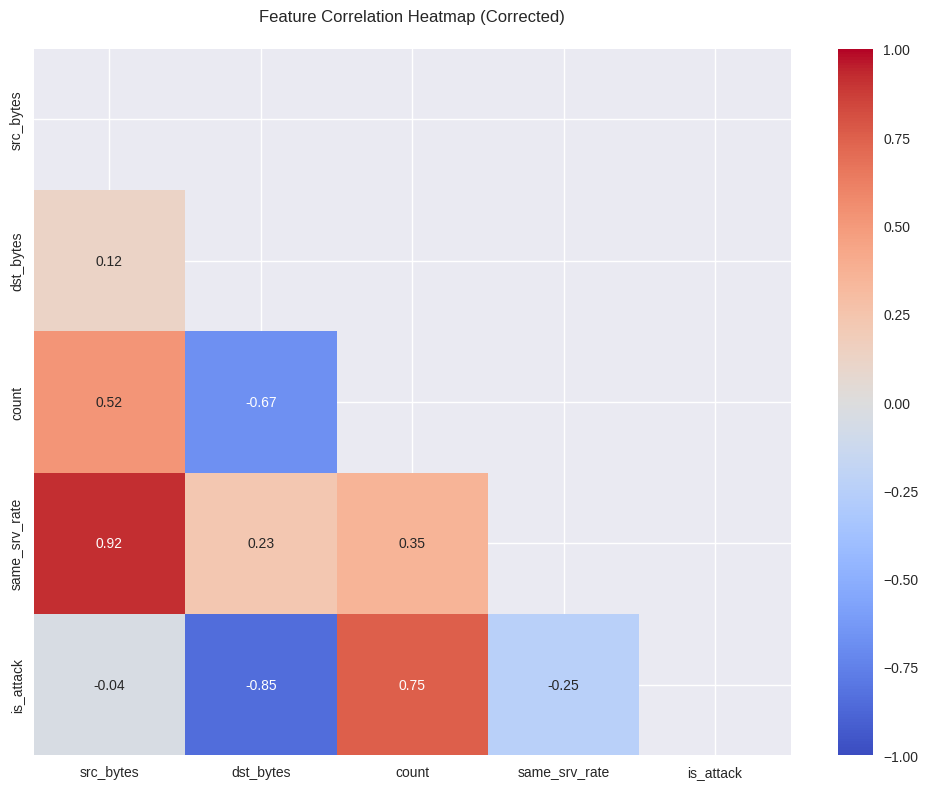

In [45]:
plt.figure(figsize=(10,8))
corr = df_clean[['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'is_attack']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap (Corrected)", pad=20)
plt.tight_layout()
plt.savefig('corrected_correlation.png')
plt.show()

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[['src_bytes', 'dst_bytes', 'count']])

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

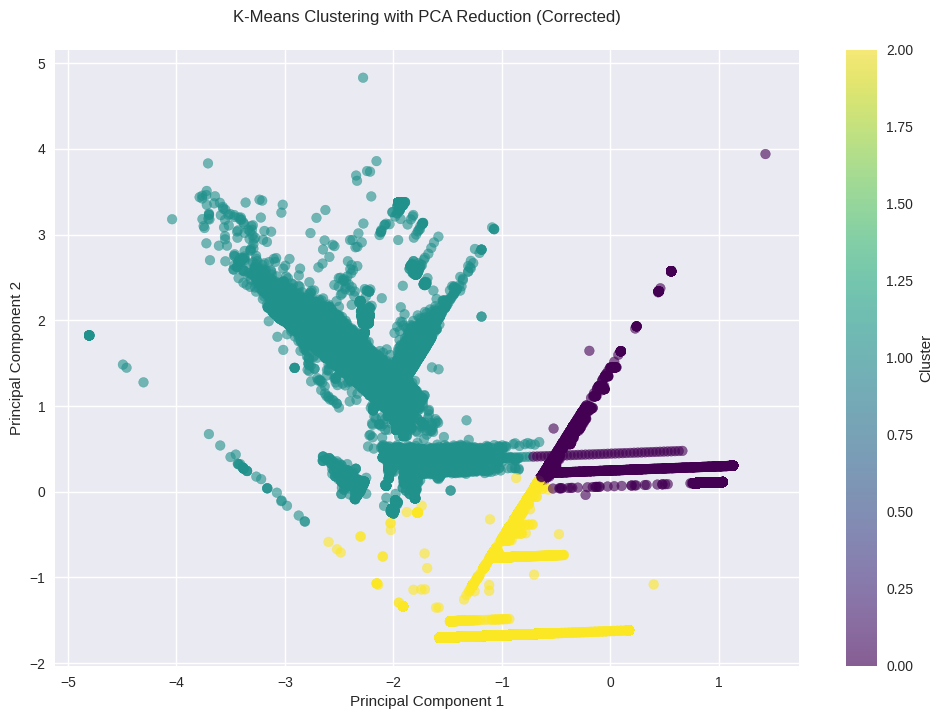

In [47]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title("K-Means Clustering with PCA Reduction (Corrected)", pad=20)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.savefig('corrected_clustering.png')
plt.show()


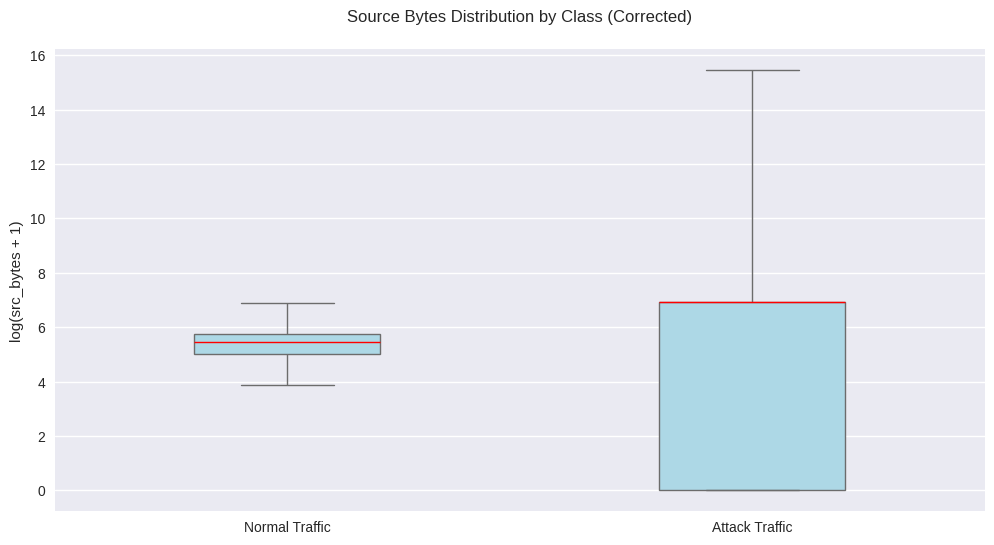

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='is_attack', y='src_bytes', data=df_clean,
            showfliers=False, width=0.4,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))
plt.title("Source Bytes Distribution by Class (Corrected)", pad=20)
plt.xticks([0,1], ['Normal Traffic', 'Attack Traffic'])
plt.xlabel("")
plt.ylabel("log(src_bytes + 1)")
plt.grid(True, axis='y')
plt.savefig('corrected_bytes_dist.png')
plt.show()


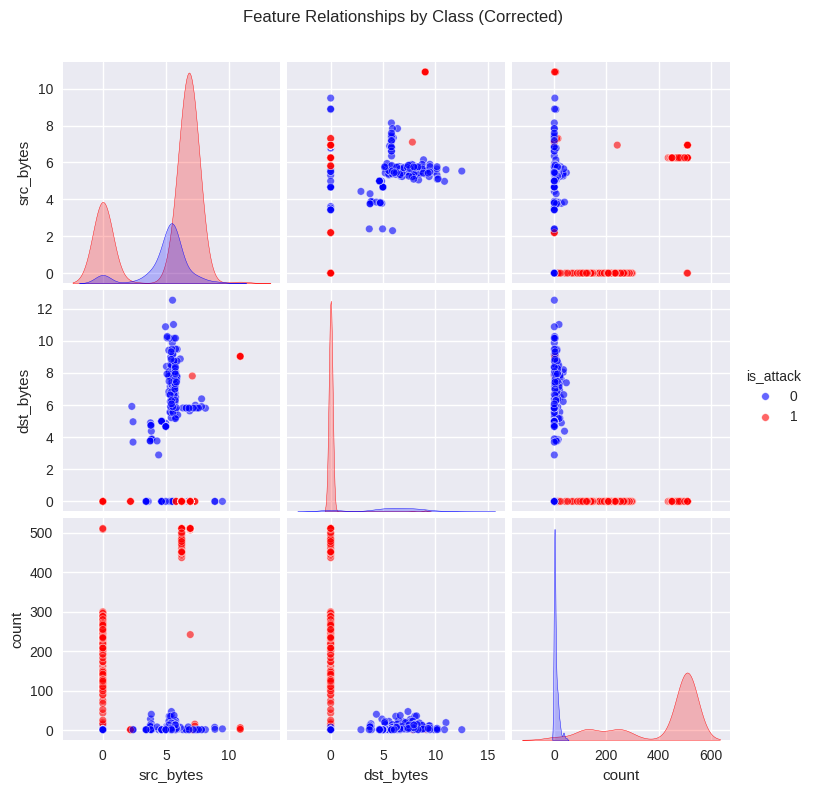

In [49]:
sample = df_clean.sample(1000)
g = sns.pairplot(sample,
                 vars=['src_bytes', 'dst_bytes', 'count'],
                 hue='is_attack',
                 plot_kws={'alpha':0.6, 's':30},
                 diag_kind='kde',
                 palette={0:'blue', 1:'red'})
g.fig.suptitle("Feature Relationships by Class (Corrected)", y=1.05)
plt.savefig('corrected_pairplot.png')
plt.show()

In [50]:
# Drop rows with NaNs from both X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)
train_data_clean = train_data.dropna()

# Separate back into X and y
X_train = train_data_clean.drop('is_attack', axis=1)
y_train = train_data_clean['is_attack']


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Drop the original label column (optional if you won't use it)
df = df.drop(columns=['label'])

# Protocol encoding (already in place)
protocol_map = {'tcp': 0, 'udp': 1, 'icmp': 2}
df['protocol_type'] = df['protocol_type'].map(protocol_map)

# Log transformation for skewed features
df['src_bytes'] = np.log1p(df['src_bytes'])
df['dst_bytes'] = np.log1p(df['dst_bytes'])

# Define X and y
X = df.drop(columns=['is_attack'])
y = df['is_attack']

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)



ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [52]:
protocol_map = {'tcp': 0, 'udp': 1, 'icmp': 2}
df['protocol_type'] = df['protocol_type'].map(protocol_map)


In [53]:
# Reload data (if needed) and remap protocol_type carefully
df = load_data()  # reload original if needed
df['protocol_type'] = df['protocol_type'].str.strip()  # strip any whitespaces

# Re-map with fallback for missing values
protocol_map = {'tcp': 0, 'udp': 1, 'icmp': 2}
df['protocol_type'] = df['protocol_type'].map(protocol_map)

# Check for unmapped entries
print("Unmapped protocol types:", df['protocol_type'].isnull().sum())


Unmapped protocol types: 0


In [54]:
# Drop any remaining NaNs (if a few exist after mapping)
df.dropna(inplace=True)


In [55]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Features and target
X = df[['src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'protocol_type']]
y = df['is_attack']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [56]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [57]:
# Fit scaler on SMOTE-applied training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_smote)

# Predict
y_pred = rf.predict(X_test_scaled)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19456
           1       1.00      1.00      1.00     79349

    accuracy                           1.00     98805
   macro avg       0.99      1.00      1.00     98805
weighted avg       1.00      1.00      1.00     98805

Confusion Matrix:
 [[19446    10]
 [  229 79120]]


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForest
rf = RandomForestClassifier(random_state=42)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit on SMOTE + scaled training data
grid_search.fit(X_train_scaled, y_train_smote)

# Best model
best_rf = grid_search.best_estimator_

# Predict using best model
y_pred_best = best_rf.predict(X_test_scaled)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
report_best = classification_report(y_test, y_pred_best, output_dict=True)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

report_best, conf_matrix_best, grid_search.best_params_


Fitting 3 folds for each of 24 candidates, totalling 72 fits


KeyboardInterrupt: 